# Testing Janus-Pro's multimodality over Flickr 30K

This notebook showcases the capability of **Deepseek's Multimodal Janus** with [Flickr30K](https://huggingface.co/datasets/nlphuji/flickr30k). ***We take first 1000 samples of Flickr dataset and generate descriptions for them and then query it using both existing original descriptions and generated descriptions by Janus Pro.***


Same sentence-transformers embedding function is used to embed both original and generated descriptions. The analysis focuses on How well does Janus performs in understanding and extracting meaning out of them.

**The goal is to highlight the level of image undestanding Deepseek's Janus Pro focuses on.**

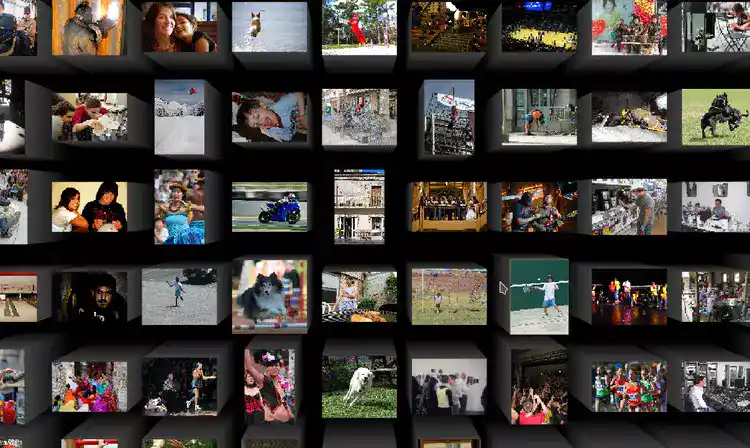

The **Flickr30k dataset** is a popular benchmark for sentence-based picture portrayal. The dataset is comprised of 31,783 images that capture people engaged in everyday activities and events. Each image has a descriptive caption. Flickr30k is used for understanding the visual media (image) that correspond to a linguistic expression (description of the image). This dataset is commonly used as a standard benchmark for sentence-based image descriptions.

## What Makes Janus-Pro Unique?
Breaking the One-Encoder Bottleneck

Unlike prior multimodal models that rely on a single visual encoder to handle both image understanding and image generation, Janus-Pro decouples these tasks into two specialized pathways:

    - Visual Understanding Encoder → Extracts meaning from images
    - Visual Generation Encoder → Synthesizes images from text descriptions

This architecture allows task-specific optimizations, preventing conflicts between interpretation and creativity.

## Installations

We'll install *datasets* library to import Flickr30k dataset.

In [ ]:
!pip install datasets lancedb -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.3/32.3 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 7.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is inco

In [ ]:
!pip install pillow

## Dataset

For this analysis, we'll use [Flickr30k Dataset](https://huggingface.co/datasets/nlphuji/flickr30k)


**Description**: The Flickr30k dataset is a popular benchmark for sentence-based picture portrayal. The dataset is comprised of 31,783 images that capture people engaged in everyday activities and events. Each image has a descriptive caption.

**Sample count**: more than 30K samples

In [ ]:
from datasets import load_dataset
import pandas as pd

dataset = load_dataset("nlphuji/flickr30k")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/641 [00:00<?, ?B/s]

flickr30k.py:   0%|          | 0.00/2.51k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/506M [00:00<?, ?B/s]

0001.parquet:   0%|          | 0.00/502M [00:00<?, ?B/s]

0002.parquet:   0%|          | 0.00/506M [00:00<?, ?B/s]

0003.parquet:   0%|          | 0.00/512M [00:00<?, ?B/s]

0004.parquet:   0%|          | 0.00/504M [00:00<?, ?B/s]

0005.parquet:   0%|          | 0.00/495M [00:00<?, ?B/s]

0006.parquet:   0%|          | 0.00/495M [00:00<?, ?B/s]

0007.parquet:   0%|          | 0.00/497M [00:00<?, ?B/s]

0008.parquet:   0%|          | 0.00/289M [00:00<?, ?B/s]

Generating test split:   0%|          | 0/31014 [00:00<?, ? examples/s]

For this analysis we'll use first 1000 samples of this dataset, you can run it on whole dataset, it would take little bit more time but could be really good comprehensive analysis.

In [ ]:
# seperating first 1000 samples
df = pd.DataFrame(dataset["test"][:1000])

In [ ]:
df

image  \
0    <PIL.JpegImagePlugin.JpegImageFile image mode=...   
1    <PIL.JpegImagePlugin.JpegImageFile image mode=...   
2    <PIL.JpegImagePlugin.JpegImageFile image mode=...   
3    <PIL.JpegImagePlugin.JpegImageFile image mode=...   
4    <PIL.JpegImagePlugin.JpegImageFile image mode=...   
..                                                 ...   
995  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
996  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
997  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
998  <PIL.JpegImagePlugin.JpegImageFile image mode=...   
999  <PIL.JpegImagePlugin.JpegImageFile image mode=...   

                                               caption  \
0    [Two young guys with shaggy hair look at their...   
1    [Several men in hard hats are operating a gian...   
2    [A child in a pink dress is climbing up a set ...   
3    [Someone in a blue shirt and hat is standing o...   
4    [Two men, one in a gray shirt, one in a black ...   
..                                                 ...   
995  [A blond woman in a white dress sits in a flow...   
996  [The two girls hold hands with one another whi...   
997  [Two tired children rest on couches at an art ...   
998  [Two children, one of which is holding a stick...   
999  [A man wearing white overalls and a baseball c...   

                            sentids  split img_id        filename  
0                   [0, 1, 2, 3, 4]  train      0  1000092795.jpg  
1                   [5, 6, 7, 8, 9]  train      1    10002456.jpg  
2              [10, 11, 12, 13, 14]  train      2  1000268201.jpg  
3              [15, 16, 17, 18, 19]  train      3  1000344755.jpg  
4              [20, 21, 22, 23, 24]  train      4  1000366164.jpg  
..                              ...    ...    ...             ...  
995  [4975, 4976, 4977, 4978, 4979]  train    995  1321651400.jpg  
996  [4980, 4981, 4982, 4983, 4984]  train    996  1321723162.jpg  
997  [4985, 4986, 4987, 4988, 4989]  train    997  1321949151.jpg  
998  [4990, 4991, 4992, 4993, 4994]  train    998  1322323208.jpg  
999  [4995, 4996, 4997, 4998, 4999]  train    999   132298659.jpg  

[1000 rows x 6 columns]

### Save Images

Save Images from seperated sample dataset into local directory to generate description of them using Deepseek's Janus Pro.

In [ ]:
import os
from PIL import Image
import pandas as pd

if not os.path.exists("/content/saved_images"):
    os.makedirs("/content/saved_images")

# Iterate over each row of the DataFrame
for index, row in df.iterrows():
    # Extract the image object and filename
    img = row["image"]
    filename = row["filename"]

    img = img.convert("RGB")
    img.save(os.path.join("/content/saved_images", filename))

print("Images have been saved successfully.")

Images have been saved successfully.


## Configure Deepseek's Multimodal Janus Pro

Clone Janus repo and build it using commands in following cell

In [ ]:
!git clone https://github.com/deepseek-ai/Janus.git

Cloning into 'Janus'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 121 (delta 51), reused 36 (delta 36), pack-reused 47 (from 2)
Receiving objects: 100% (121/121), 7.19 MiB | 13.73 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [ ]:
%cd Janus
!pip install -e .
!pip install flash-attn

/content/Janus
Obtaining file:///content/Janus
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

Import Janus-Pro-1B model.

We have used Janus-Pro-1B for running it on Colab's free T4 GPU, You can go for bigger Janus-Pro-7B as per your compute.

In [ ]:
import torch
from transformers import AutoModelForCausalLM
from janus.models import MultiModalityCausalLM, VLChatProcessor
from janus.utils.io import load_pil_images

model_path = "deepseek-ai/Janus-Pro-1B"
vl_chat_processor: VLChatProcessor = VLChatProcessor.from_pretrained(model_path)
tokenizer = vl_chat_processor.tokenizer

vl_gpt: MultiModalityCausalLM = AutoModelForCausalLM.from_pretrained(
    model_path, trust_remote_code=True, use_flash_attention_2=False
)
vl_gpt = vl_gpt.to(torch.bfloat16).cuda().eval()

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Python version is above 3.10, patching the collections module.


/usr/local/lib/python3.11/dist-packages/transformers/models/auto/image_processing_auto.py:590: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.72M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/344 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.


processor_config.json:   0%|          | 0.00/210 [00:00<?, ?B/s]

Some kwargs in processor config are unused and will not have any effect: mask_prompt, ignore_id, image_tag, add_special_token, num_image_tokens, sft_format. 


config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Generate descriptions of saved images and save them in csv file, as per Colab's compute it took around 55 mins to generate description for 1000 images so its recommended to save these generated description into a CSV file and then run test on them.

In [ ]:
import os
import pandas as pd
from PIL import Image
from tqdm import tqdm

# Path to images folder
folder_path = "/content/saved_images"

image_data = []

for filename in tqdm(os.listdir(folder_path), desc="Processing images", unit="image"):
    image_path = os.path.join(folder_path, filename)

    conversation = [
        {
            "role": "User",
            "content": "<image_placeholder>\nDescribe the image.",
            "images": [f"{image_path}"],
        },
        {"role": "Descriptor", "content": ""},
    ]

    # load images and prepare for inputs
    pil_images = load_pil_images(conversation)
    prepare_inputs = vl_chat_processor(
        conversations=conversation, images=pil_images, force_batchify=True
    ).to(vl_gpt.device)

    # # run image encoder to get the image embeddings
    inputs_embeds = vl_gpt.prepare_inputs_embeds(**prepare_inputs)

    # # run the model to get the response
    outputs = vl_gpt.language_model.generate(
        inputs_embeds=inputs_embeds,
        attention_mask=prepare_inputs.attention_mask,
        pad_token_id=tokenizer.eos_token_id,
        bos_token_id=tokenizer.bos_token_id,
        eos_token_id=tokenizer.eos_token_id,
        max_new_tokens=512,
        do_sample=False,
        use_cache=True,
    )

    answer = tokenizer.decode(outputs[0].cpu().tolist(), skip_special_tokens=True)
    image_data.append({"image_path": image_path, "description": answer})

Processing images: 100%|██████████| 1000/1000 [55:20<00:00,  3.32s/image]


In [ ]:
generated_df = pd.DataFrame(image_data)
generated_df.to_csv("/content/image_data.csv", index=False)

Merge original and generated captions of images into same dataframe.

In [ ]:
import pandas as pd

df["filename"] = df["filename"].str.split("/").str[-1]
generated_df["filename"] = generated_df["image_path"].str.split("/").str[-1]

merged_df = pd.merge(
    df, generated_df[["filename", "description"]], on="filename", how="left"
)
final_df = merged_df[["filename", "description", "caption"]]

In [ ]:
final_df

filename                                        description  \
0    1000092795.jpg  The image shows two people standing in a garde...   
1      10002456.jpg  The image shows a group of workers on a tall m...   
2    1000268201.jpg  The image shows a small wooden structure, poss...   
3    1000344755.jpg  The image shows a person wearing a blue shirt ...   
4    1000366164.jpg  The image shows two people in a kitchen. One p...   
..              ...                                                ...   
995  1321651400.jpg  The image shows a person sitting on a tree bra...   
996  1321723162.jpg  The image shows a woman wearing a white shirt ...   
997  1321949151.jpg  The image shows a group of people in an art ga...   
998  1322323208.jpg  The image shows two children playing on a beac...   
999   132298659.jpg  The image shows a person wearing a white overa...   

                                               caption  
0    [Two young guys with shaggy hair look at their...  
1    [Several men in hard hats are operating a gian...  
2    [A child in a pink dress is climbing up a set ...  
3    [Someone in a blue shirt and hat is standing o...  
4    [Two men, one in a gray shirt, one in a black ...  
..                                                 ...  
995  [A blond woman in a white dress sits in a flow...  
996  [The two girls hold hands with one another whi...  
997  [Two tired children rest on couches at an art ...  
998  [Two children, one of which is holding a stick...  
999  [A man wearing white overalls and a baseball c...  

[1000 rows x 3 columns]

In [ ]:
final_df.to_csv("/content/finalimage_data.csv", index=False)

Saved this merged data as an backup

In [ ]:
import pandas as pd

df = pd.read_csv("/content/finalimage_data.csv")
print(df)

           filename                                        description  \
0    1000092795.jpg  The image shows two people standing in a garde...   
1      10002456.jpg  The image shows a group of workers on a tall m...   
2    1000268201.jpg  The image shows a small wooden structure, poss...   
3    1000344755.jpg  The image shows a person wearing a blue shirt ...   
4    1000366164.jpg  The image shows two people in a kitchen. One p...   
..              ...                                                ...   
995  1321651400.jpg  The image shows a person sitting on a tree bra...   
996  1321723162.jpg  The image shows a woman wearing a white shirt ...   
997  1321949151.jpg  The image shows a group of people in an art ga...   
998  1322323208.jpg  The image shows two children playing on a beac...   
999   132298659.jpg  The image shows a person wearing a white overa...   

                                               caption  
0    ['Two young guys with shaggy hair look at thei...

In [ ]:
import ast

df["caption"] = df["caption"].apply(
    lambda x: ast.literal_eval(x)[0] if isinstance(ast.literal_eval(x), list) else x
)

In [ ]:
df.head()

filename                                        description  \
0  1000092795.jpg  The image shows two people standing in a garde...   
1    10002456.jpg  The image shows a group of workers on a tall m...   
2  1000268201.jpg  The image shows a small wooden structure, poss...   
3  1000344755.jpg  The image shows a person wearing a blue shirt ...   
4  1000366164.jpg  The image shows two people in a kitchen. One p...   

                                             caption  
0  Two young guys with shaggy hair look at their ...  
1  Several men in hard hats are operating a giant...  
2  A child in a pink dress is climbing up a set o...  
3  Someone in a blue shirt and hat is standing on...  
4  Two men, one in a gray shirt, one in a black s...

## Analysis

Here, we'll create two tables, one containing generated descriptions another containing dataset descriptions and then running same query on both of them to see which one gives us better results.

In [ ]:
import lancedb
from lancedb.pydantic import LanceModel, Vector
from lancedb.embeddings import get_registry

db = lancedb.connect("/tmp/janus-lancedb")
func = (
    get_registry()
    .get("sentence-transformers")
    .create(name="BAAI/bge-small-en-v1.5", device="cpu")
)


class JanusGenerated(LanceModel):
    filename: str
    caption: str  # original captions as the source
    description: str = func.SourceField()  # generated captions as the source
    vector: Vector(func.ndims()) = func.VectorField()  # vector column


class datasetDescription(LanceModel):
    filename: str
    caption: str = func.SourceField()  # original captions as the source
    description: str  # generated captions as the source
    vector: Vector(func.ndims()) = func.VectorField()  # vector column

In [ ]:
# table creation as per above defined schemas
janus_table = db.create_table(
    "janus-generated", schema=JanusGenerated, mode="overwrite"
)
original_table = db.create_table(
    "original", schema=datasetDescription, mode="overwrite"
)

In [ ]:
# adding data in tables
janus_table.add(df)
original_table.add(df)

In [ ]:
# helper function to show images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os


def show_images_in_folder(folder_path, filenames):
    num_images = len(filenames)
    plt.figure(figsize=(5 * num_images, 5))

    for i, filename in enumerate(filenames):
        img_path = os.path.join(folder_path, filename)
        img = mpimg.imread(img_path)

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis("off")

    # Show the images
    plt.show()

## Query

**Query on Janus-Pro Generated Description**

In [ ]:
results = janus_table.search("person standing on balcony").limit(5).to_pandas()

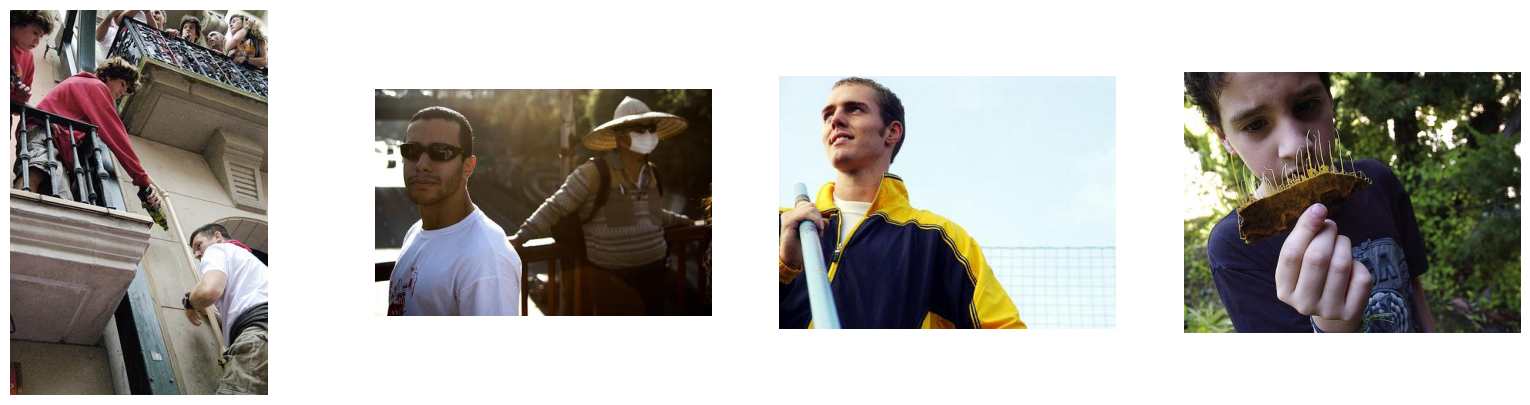

In [ ]:
folder_path = "/content/saved_images"
filenames = [results["filename"][i] for i in range(4)]

show_images_in_folder(folder_path, filenames)

**Query on Original Dataset Description**

In [ ]:
results = original_table.search("person standing on balcony").limit(5).to_pandas()

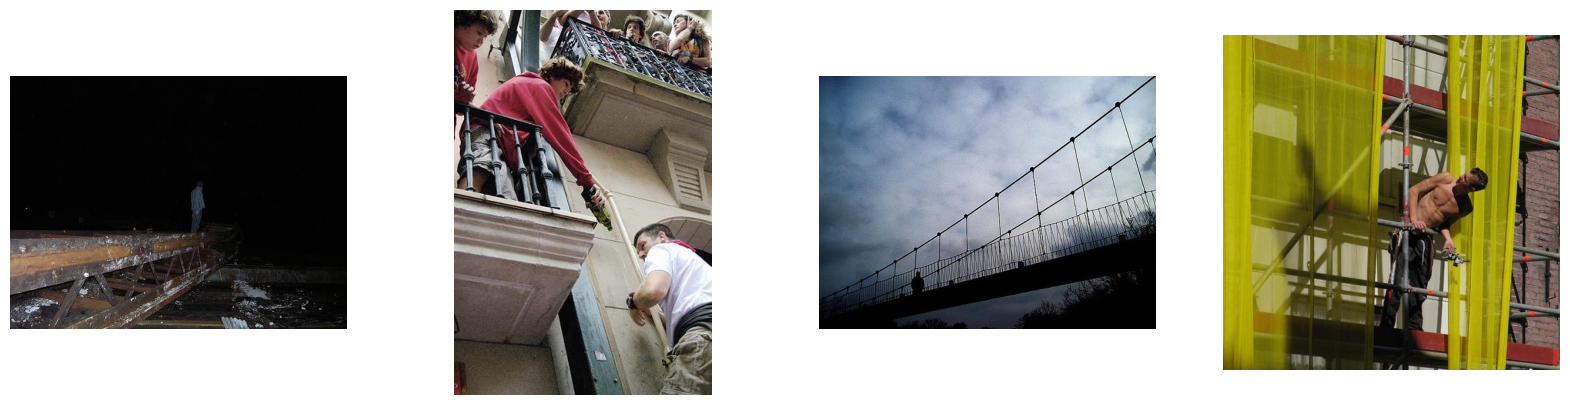

In [ ]:
folder_path = "/content/saved_images"
filenames = [results["filename"][i] for i in range(4)]

show_images_in_folder(folder_path, filenames)

**Query on Janus-Pro Generated Description**

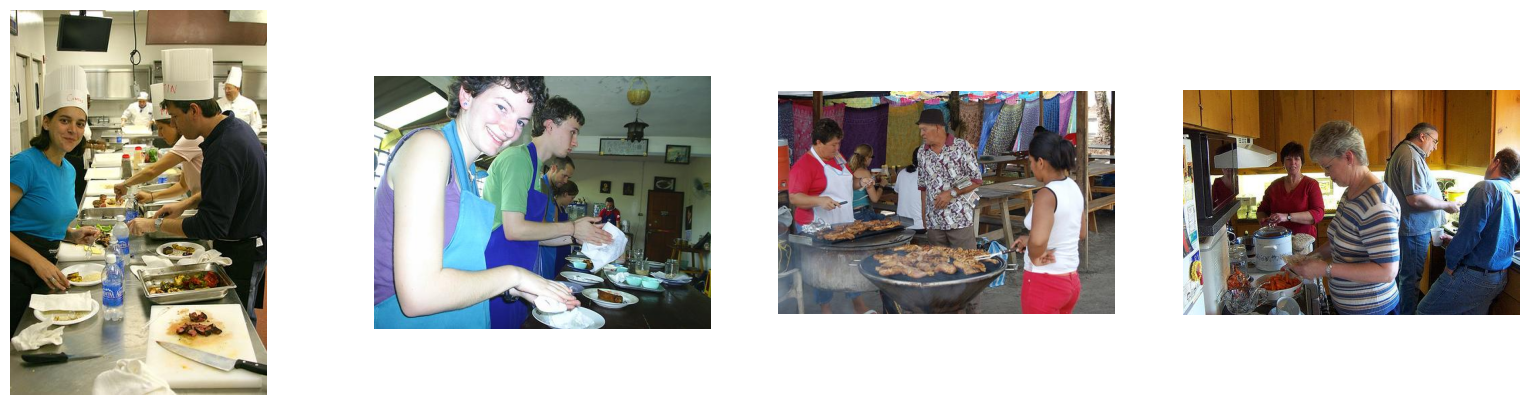

In [ ]:
results = janus_table.search("group of people cooking together").limit(5).to_pandas()
folder_path = "/content/saved_images"
filenames = [results["filename"][i] for i in range(4)]

show_images_in_folder(folder_path, filenames)

**Query on Original Dataset Description**

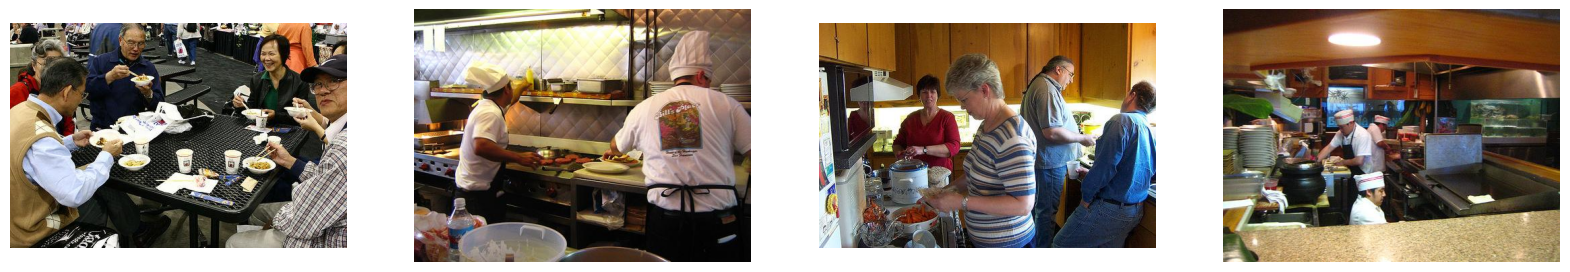

In [ ]:
results = original_table.search("group of people cooking together").limit(5).to_pandas()
folder_path = "/content/saved_images"
filenames = [results["filename"][i] for i in range(4)]

show_images_in_folder(folder_path, filenames)

## Analysis Conclusion

From above two queries it can be clearly seen than descriptions generated by Janus-Pro clearly outperforms the original descriptions which dataset has, which shows the understanding of Janus-Pro model.